In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as sk_mse
from skimage.metrics import structural_similarity as sk_ssim

from tqdm import tqdm
from utils.utils import *

color_list = plt.cm.Pastel1(np.arange(9))

In [3]:
def plot_heatmap(y, x=None, title='temp', figures_dir='figures', filename='temp.png', show=False, save=False):
    # 热图
    m, n = y.shape

    plt.figure(figsize=(6, 6), dpi=100)
    plt.imshow(y, cmap='Reds', origin='lower', vmin=-0.1, vmax=1.1)
    if (x is None):
        plt.xticks(np.arange(m), np.arange(m), fontsize=10)
        plt.yticks(np.arange(n), np.arange(m), fontsize=10)
    else:
        plt.xticks(np.arange(m), x, fontsize=10)
        plt.yticks(np.arange(n), x, fontsize=10)

    # 每个方格上标记数值
    for i in range(m):
        for j in range(n):
            plt.text(j, i, '{:.3f}'.format(y[i, j]), 
                     ha="center", va="center", color="black", fontsize=10)

    plt.title(title)

    if (save==True):
        plt.savefig(figures_dir + filename)
    if (show==True):
        plt.show()
    plt.close()

In [10]:
nB = 3
filename = f'results/default/2v{nB}_Ys_pred_list.npy'
Ys_pred_list_1 = np.load(filename)[index_list]

In [11]:
nB = 3
filename = f'2v{nB}_Ys_pred_list.npy'
Ys_pred_list_2 = np.load(filename)

In [12]:
Ys_pred_list_1[:10]

array([[ 0.01576356, -0.01070063,  0.0021943 ,  0.00138144, -0.013414  ,
         0.00231912,  0.0017389 , -0.000098  ,  0.00105265],
       [ 0.04123779, -0.01284014, -0.06512268, -0.02352048, -0.02604799,
         0.09834258, -0.01562227,  0.03491757,  0.96867794],
       [ 0.00508546, -0.05869046, -0.0437384 , -0.01841623,  0.09013662,
        -0.03208927,  0.01634527,  0.96205264,  0.07926962],
       [ 0.04606092, -0.05195778, -0.0557478 , -0.07846057,  0.07992835,
         0.07600421,  0.03516877,  0.97145045,  0.9776185 ],
       [ 0.00066767,  0.03276269, -0.01644805,  0.01674632, -0.06589659,
         0.01932444,  0.98523146,  0.02632939,  0.00154252],
       [ 0.00909037, -0.09085569,  0.13436459,  0.11001239,  0.02796002,
         0.25212824,  0.55257976,  0.58786094,  1.0149435 ],
       [-0.08102568, -0.02898933, -0.04038404,  0.05760971,  0.08952931,
        -0.02998023,  1.0215547 ,  0.9410424 ,  0.07060314],
       [ 0.00475003,  0.00389681, -0.00785308, -0.00832682, -0

In [13]:
Ys_pred_list_2[:10]

array([[ 0.07418582,  0.03761119,  0.0124235 ,  0.08770672,  0.0575566 ,
         0.02007317,  0.18644115,  0.16786316,  0.08330267],
       [-0.02584384, -0.02895132, -0.09629866, -0.01947947,  0.08258854,
         0.15274039, -0.10493505,  0.15479657,  0.8830439 ],
       [-0.08400678,  0.02631087,  0.06728966, -0.03847947,  0.12387366,
        -0.09701078,  0.14366597,  0.82678455,  0.0287251 ],
       [-0.10573573, -0.05659827, -0.07661495,  0.02396709,  0.20791891,
         0.0889114 ,  0.06183147,  0.88709146,  0.96444887],
       [ 0.04701532, -0.09706715,  0.02859814,  0.10699724, -0.09364011,
         0.02753039,  0.85679805,  0.18036565, -0.05621901],
       [ 0.03866743, -0.01905301, -0.02754977, -0.00461382, -0.03381732,
         0.05114195,  0.52232105,  0.5697745 ,  0.90319467],
       [-0.04921424, -0.09913617, -0.05241233,  0.1413014 ,  0.05105075,
        -0.04663977,  1.0432749 ,  0.8381785 ,  0.14743908],
       [-0.13669571, -0.06590488, -0.07391672,  0.09593152,  0

In [4]:
def generate_Ys_list(dim=3, no_repeat=True):
    Ys_list = np.array(list(itertools.product([0, 1], repeat=dim*dim)))
    no_repeat_Ys_list = []
    index_list = []
    if (no_repeat == False):
        return Ys_list
    else:
        for i in range(len(Ys_list)):
            Ys = Ys_list[i]
            Ys_T = Ys.reshape(dim, dim).T.reshape(-1)
            flag = False
            for no_repeat_Ys in no_repeat_Ys_list:
                if ((no_repeat_Ys == Ys_T).all()):
                    flag = True
                    break
            if (flag == False):
                no_repeat_Ys_list.append(Ys)
                index_list.append(i)
    return no_repeat_Ys_list, index_list


In [5]:
no_repeat_Ys_list, index_list = generate_Ys_list()

In [15]:
Ys_list = generate_Ys_list(dim=3, no_repeat=False)

mse_lists = []
ssim_lists = []

for nB in [2,3,4,5,6]:
    filename = f'results/default/2v{nB}_Ys_pred_list.npy'
    Ys_pred_list = np.load(filename)[index_list]
    mse_list = []
    ssim_list = []
    for i in range(len(no_repeat_Ys_list)):
        mse_list.append(sk_mse(no_repeat_Ys_list[i], Ys_pred_list[i]))
        ssim_list.append(sk_ssim(no_repeat_Ys_list[i].astype(np.float32), Ys_pred_list[i]))
    mse_lists.append(mse_list)
    ssim_lists.append(ssim_list)


for nB in [2,3,4,5,6]:
    filename = f'results/fix_A/2v{nB}_Ys_pred_list.npy'
    Ys_pred_list = np.load(filename)
    mse_list = []
    ssim_list = []
    for i in range(len(no_repeat_Ys_list)):
        mse_list.append(sk_mse(no_repeat_Ys_list[i], Ys_pred_list[i]))
        ssim_list.append(sk_ssim(no_repeat_Ys_list[i].astype(np.float32), Ys_pred_list[i]))
    mse_lists.append(mse_list)
    ssim_lists.append(ssim_list)


for nB in [3]:
    filename = f'2v{nB}_Ys_pred_list.npy'
    Ys_pred_list = np.load(filename)
    mse_list = []
    ssim_list = []
    for i in range(len(no_repeat_Ys_list)):
        mse_list.append(sk_mse(no_repeat_Ys_list[i], Ys_pred_list[i]))
        ssim_list.append(sk_ssim(no_repeat_Ys_list[i].astype(np.float32), Ys_pred_list[i]))
    mse_lists.append(mse_list)
    ssim_lists.append(ssim_list)




mse_lists = np.array(mse_lists)
ssim_lists = np.array(ssim_lists)

In [14]:
'''x = [2,3,4,5]
threshold_list = [0.005, 0.01, 0.02, 0.05, 0.1]

plt.figure(figsize=(8, 6))

plt.plot(x, data2[:, 0], label='mse<0.005', color=color_list[0])
plt.plot(x, data2[:, 1], label='mse<0.01', color=color_list[1])
plt.plot(x, data2[:, 2], label='mse<0.02', color=color_list[2])
plt.plot(x, data2[:, 3], label='mse<0.05', color=color_list[3])
plt.plot(x, data2[:, 4], label='mse<0.1', color=color_list[4])
plt.xticks([2,3,4,5])

plt.xlabel('receptor numbers')
plt.ylabel('ratio in 512 patterns')
plt.title('mse<threshold ratio')
plt.legend()

plt.show()'''

"x = [2,3,4,5]\nthreshold_list = [0.005, 0.01, 0.02, 0.05, 0.1]\n\nplt.figure(figsize=(8, 6))\n\nplt.plot(x, data2[:, 0], label='mse<0.005', color=color_list[0])\nplt.plot(x, data2[:, 1], label='mse<0.01', color=color_list[1])\nplt.plot(x, data2[:, 2], label='mse<0.02', color=color_list[2])\nplt.plot(x, data2[:, 3], label='mse<0.05', color=color_list[3])\nplt.plot(x, data2[:, 4], label='mse<0.1', color=color_list[4])\nplt.xticks([2,3,4,5])\n\nplt.xlabel('receptor numbers')\nplt.ylabel('ratio in 512 patterns')\nplt.title('mse<threshold ratio')\nplt.legend()\n\nplt.show()"

In [19]:
mse_lists.shape

(11, 288)

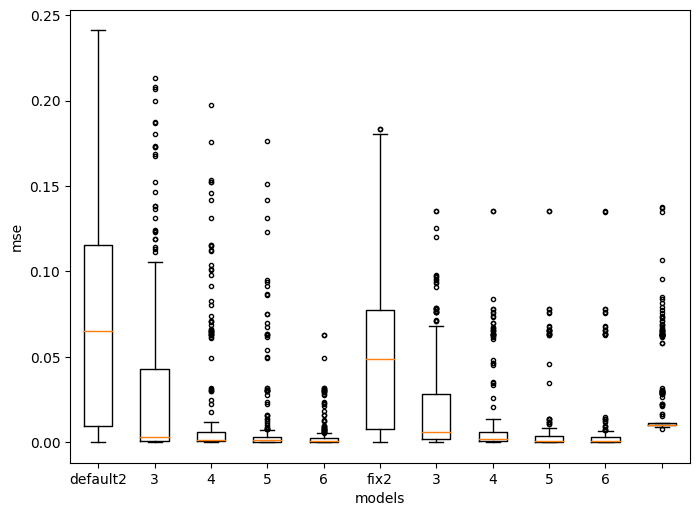

In [17]:
# rectangular box plot
plt.figure(figsize=(8, 6), dpi=100)
plt.boxplot(mse_lists.T, sym='.', labels=['default2', '3', '4', '5', '6', 'fix2', '3', '4', '5', '6', ''])
plt.xlabel('models')
plt.ylabel('mse')
plt.savefig('figures/mse_boxplot.png')
plt.show()

In [18]:
'''# rectangular box plot
plt.figure(figsize=(8, 6), dpi=100)
plt.boxplot(ssim_lists.T, sym='.', labels=['default2', '3', '4', '5', '6', 'fix2', '3', '4', '5', '6'])
plt.xlabel('models')
plt.ylabel('ssim')
plt.savefig('figures/ssim_boxplot.png')
plt.show()'''

"# rectangular box plot\nplt.figure(figsize=(8, 6), dpi=100)\nplt.boxplot(ssim_lists.T, sym='.', labels=['default2', '3', '4', '5', '6', 'fix2', '3', '4', '5', '6'])\nplt.xlabel('models')\nplt.ylabel('ssim')\nplt.savefig('figures/ssim_boxplot.png')\nplt.show()"